In [24]:
# import library
import pandas as pd
import glob
from importlib import reload
import natsort 
reload(natsort)
from natsort import natsorted
import itertools
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss

# read 5day step csv file 
csv_path = glob.glob(r"C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2022\*.csv")
#csv_path = glob.glob(r"/Users/moritakayuki/Desktop/2022/*.csv")
sorted_files = natsorted(csv_path)
for temp in sorted_files:
    print(temp)
    
#欠損日を含む2022年のSentinel-2データ取得日
year =['2022/']
day_2022= ['1/4' ,'1/9','1/14','1/19','1/24','1/29','2/3','2/8','2/13','2/18','2/23','2/28','3/5',
           '3/10','3/15','3/20','3/25','3/30','4/4','4/9','4/14','4/19','4/24','4/29','5/4',
           '5/9','5/14','5/19','5/24','5/29','6/3','6/8','6/13','6/18','6/23','6/28','7/3',
           '7/8','7/13','7/18','7/23','7/28','8/2','8/7','8/12','8/17','8/22','8/27','9/1',
           '9/6','9/11','9/16','9/21','9/26','10/1','10/6','10/11','10/16','10/21','10/26',
           '10/31','11/05','11/10','11/15','11/20','11/25','11/30','12/05','12/10','12/15','12/20']
ymd_date_2022 = [year[0] + d for d in day_2022]

#2022年のSentinel-2データ取得日
year =['2022/']
day= ['1/4','1/9','1/24','1/29','2/3','2/28','3/10','3/20','3/30','4/4','4/9',
      '4/14','4/19','4/24','5/4','5/9','5/14','5/19','5/24','6/3','6/8','6/13',
      '6/18','6/23','6/28','7/3','7/8','7/18','7/23','7/28','8/2','8/7','8/12',
      '8/17','8/22','8/27','9/6','9/11','9/16','9/21','9/26','10/1','10/6','10/16',
      '10/21','10/31','11/5','11/10','11/30','12/5','12/10','12/15','12/20'] 
ymd_date = [year[0] + d for d in day]

# 対象期間の絞り込み（テストサイトの移植日は早くても）
year =['2022/']
DOI = ['4/9','4/14','4/19','4/24','4/29','5/4','5/9','5/14',
       '5/19','5/24','5/29','6/3','6/8','6/13','6/18','6/23','6/28','7/3',
       '7/8','7/13','7/18','7/23','7/28','8/2','8/7','8/12','8/17', '8/22',
       '8/27','9/1', '9/6','9/11','9/16','9/21','9/26','10/1']
doi_date_2022 = [year[0] + d for d in DOI]

# read index 
output_list = []
output_colums = list(range(1, 138025))
for input_file in sorted_files:
    input_df = pd.read_csv(input_file, encoding="utf-8-sig", skiprows=1, nrows=138024, usecols=[21], header=None)
    input_list = input_df.to_numpy().tolist()
    output_row = list(itertools.chain.from_iterable(input_list))
    output_list.append(output_row)

# NDVI timeseries dataframe
output_df = pd.DataFrame(output_list, columns=output_colums, index=ymd_date, dtype=np.float64)
output_df_trans = output_df.T
#output_df_trans.head()

# Reindex to include NaN for missing dates in 2022
output_df_2022 = output_df.reindex(index=ymd_date_2022)
output_df_2022.replace("           nan", np.nan, inplace=True)
output_df_2022_t = output_df_2022.T

# save
output_df_2022.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2022\2022_timeseries_all.csv")
output_df_2022_t.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2022\2022_timeseries_all_t.csv")

# 対象期間の絞り込み
doy_2022 = output_df_2022_t[doi_date_2022]
doy_2022_t = doy_2022.T

# save
doy_2022_t.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2022\2022_timeseries_doi.csv")
doy_2022.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2022\2022_timeseries_doi_t.csv")

# Savitzy Golay filter
a_int = doy_2022_t.interpolate()
a_int.replace(np.nan, "NaN")
b = a_int.dropna(axis=1)
df_sg = pd.DataFrame(index=b.index)
window_length = 13  
polyorder = 4
filtered = {}
columns = list(b.columns)
for i in range(131674):   #-1
    df_sg[columns[i]] = ss.savgol_filter(b[columns[i]], window_length=window_length, polyorder=polyorder)
df_sg.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2022\2022_timeseries_sg_t.csv") 

C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2022\20220104_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2022\20220109_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2022\20220124_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2022\20220129_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2022\20220203_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2022\20220228_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2022\20220310_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2022\20220320_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2022\20220330_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2022\20220404_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2022\20220409_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2022\20220414_parcel.csv
C:\U

C:\Users\HONGO-23\AppData\Local\Temp\ipykernel_6708\1548571130.py:88: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sg[columns[i]] = ss.savgol_filter(b[columns[i]], window_length=window_length, polyorder=polyorder)


In [ ]:
#2022/3/30-10/01

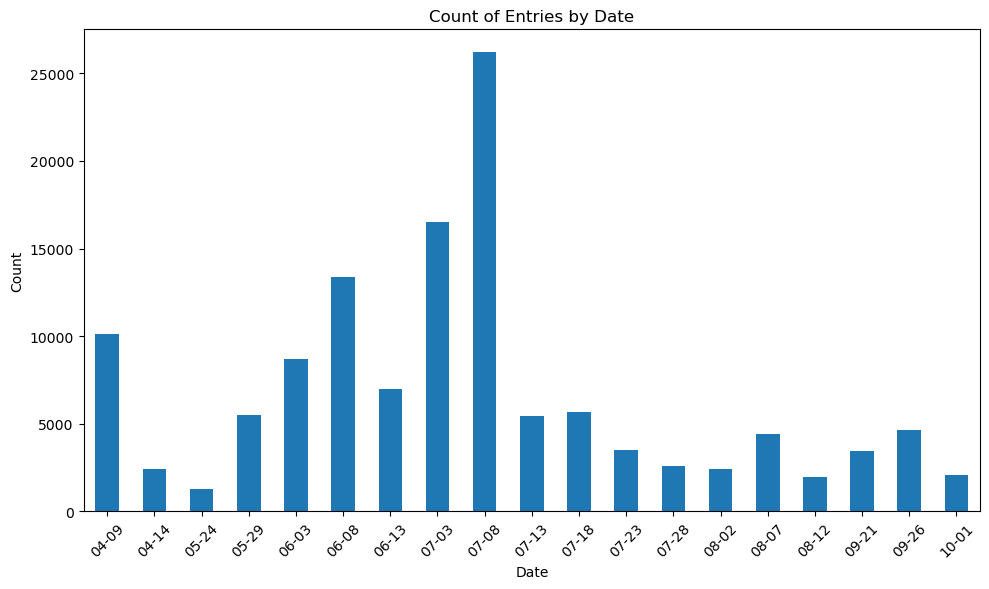

In [27]:
    
# NDVI 最大日
columns = list(df_sg.columns)
max_index = df_sg.idxmax()
df = pd.DataFrame(max_index,columns=['Max_Date'])
df.index.name = 'OBJECTID'
#df.to_csv("/Users/moritakayuki/Desktop/jupyter_notebook/NDVI.csv")
df.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2022\2022_heading_date.csv")

# 日付型に変換
df['Max_Date'] = pd.to_datetime(df['Max_Date'])

# 2022/3/20から2022/10/11までの日付を範囲としてカウント
date_range = pd.date_range(start='2022/4/9', end='2022/10/01', freq='D')
counts = df['Max_Date'].value_counts().reindex(date_range, fill_value=0)

# カウントがある日付のみを取得
valid_dates = counts[counts > 1000]

# 月日の形式に変換
valid_dates.index = valid_dates.index.strftime('%m-%d')

# 棒グラフをプロット
plt.figure(figsize=(10, 6))
valid_dates.plot(kind='bar')
plt.title('Count of Entries by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()